In [1]:
# pip install tpot --user

In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# missing value imputation
from sklearn.impute import KNNImputer

# for pre-processing
from sklearn.preprocessing import StandardScaler


# for pre-modelling
from sklearn.model_selection import train_test_split, GridSearchCV

# for modelling
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from tpot import TPOTRegressor

# for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [294]:
# import sys
# sys.executable

In [295]:
df1=  pd.read_csv("Raw_data_1Day_2021_site_5273_City_Center_Gwalior_MPPCB_1Day.csv")
df2 = pd.read_csv("Raw_data_1Day_2022_site_5273_City_Center_Gwalior_MPPCB_1Day.csv")
df3 = pd.read_csv("Raw_data_1Day_2023_site_5273_City_Center_Gwalior_MPPCB_1Day.csv")

In [296]:
df3

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2023-01-01,156.739583,206.093750,6.172222,28.092361,19.962500,36.719097,5.359058,0.854896,36.419444,...,NaN,12.078125,83.822917,0.479167,154.364583,0.0,0.0,234.145833,748.708333,NaN
1,2023-01-02,116.791667,154.746528,1.247569,21.615278,12.508333,31.073958,8.927431,0.657396,47.303125,...,NaN,11.454167,83.041667,0.575000,173.500000,0.0,0.0,232.510417,749.677083,NaN
2,2023-01-03,122.489583,163.625000,3.141667,27.527431,17.189236,29.011111,5.787847,0.871840,44.793750,...,NaN,9.412500,84.177083,0.630208,193.416667,0.0,0.0,203.302083,750.281250,NaN
3,2023-01-04,163.979167,230.923611,13.502083,33.214931,28.646528,32.346181,7.926042,1.158160,36.975000,...,NaN,8.141667,86.520833,0.442708,179.145833,0.0,0.0,188.854167,750.531250,NaN
4,2023-01-05,219.842593,290.277778,21.313426,35.541204,36.247222,33.755556,9.233333,1.593843,31.268519,...,NaN,7.622685,83.865741,0.511574,144.458333,0.0,0.0,263.597222,752.027778,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,126.979167,237.166667,3.225347,29.528819,17.321181,36.168403,15.858681,0.831354,31.955556,...,NaN,16.025000,82.343750,0.366667,190.270833,0.0,0.0,230.187500,746.708333,NaN
361,2023-12-28,134.052083,231.864583,3.221528,27.026736,15.997917,39.536111,14.704861,0.771563,28.114236,...,NaN,13.734375,91.635417,0.392708,202.677083,0.0,0.0,158.875000,746.135417,NaN
362,2023-12-29,133.937500,187.729167,3.150000,21.695833,13.104167,30.373958,40.257639,2.111528,34.129167,...,NaN,13.931250,85.302083,0.406250,170.375000,0.0,0.0,183.135417,746.656250,NaN
363,2023-12-30,106.666667,188.427083,3.132986,23.118403,13.839236,27.712153,17.720486,0.928958,29.254861,...,NaN,13.118750,87.406250,0.357292,147.781250,0.0,0.0,191.041667,745.562500,NaN


- 

**Changing the data type of *timestamp* feature to *datetime* data type**

In [297]:
# changing the data type of **timestamp** in dataset to datetime format
df1['Timestamp'] = pd.to_datetime(pd.to_datetime(df1['Timestamp']).dt.date)
df2['Timestamp'] = pd.to_datetime(pd.to_datetime(df2['Timestamp']).dt.date)
df3['Timestamp'] = pd.to_datetime(df3['Timestamp'])

**What are the parameters that are used in the dataset to measure air pollution?**

In [298]:
df1.columns

Index(['Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)',
       'NO2 (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
       'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)', 'Xylene (µg/m³)',
       'O Xylene (µg/m³)', 'Eth-Benzene (µg/m³)', 'MP-Xylene (µg/m³)',
       'AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'RF (mm)', 'TOT-RF (mm)',
       'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)'],
      dtype='object')

In [299]:
a = df2.columns == df3.columns
b = df1.columns == df2.columns
print(a)
print(b)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]


**Shapes of the datasets**

In [300]:
print(f"df1 : {df1.shape}\ndf2 : {df2.shape}\ndf3: {df3.shape}")

df1 : (365, 25)
df2 : (365, 25)
df3: (365, 25)


**Merging the dataset into 1 single dataset**

In [301]:
df = (pd.concat([df1,df2,df3], axis = 0))
df.shape

(1095, 25)

We can see the index number haven't updated with the concat. Let's change that.

In [302]:
index_sequence = range(df.shape[0])
df.index = index_sequence

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            1095 non-null   datetime64[ns]
 1   PM2.5 (µg/m³)        1080 non-null   float64       
 2   PM10 (µg/m³)         1077 non-null   float64       
 3   NO (µg/m³)           1081 non-null   float64       
 4   NO2 (µg/m³)          1081 non-null   float64       
 5   NOx (ppb)            1081 non-null   float64       
 6   NH3 (µg/m³)          1080 non-null   float64       
 7   SO2 (µg/m³)          1081 non-null   float64       
 8   CO (mg/m³)           1062 non-null   float64       
 9   Ozone (µg/m³)        1080 non-null   float64       
 10  Benzene (µg/m³)      0 non-null      float64       
 11  Toluene (µg/m³)      0 non-null      float64       
 12  Xylene (µg/m³)       0 non-null      float64       
 13  O Xylene (µg/m³)     0 non-null  

**Checking for the null values, duplicated values.**

In [304]:
# % of missing values among features
df.isnull().sum()*100/df.shape[0]

Timestamp                0.000000
PM2.5 (µg/m³)            1.369863
PM10 (µg/m³)             1.643836
NO (µg/m³)               1.278539
NO2 (µg/m³)              1.278539
NOx (ppb)                1.278539
NH3 (µg/m³)              1.369863
SO2 (µg/m³)              1.278539
CO (mg/m³)               3.013699
Ozone (µg/m³)            1.369863
Benzene (µg/m³)        100.000000
Toluene (µg/m³)        100.000000
Xylene (µg/m³)         100.000000
O Xylene (µg/m³)       100.000000
Eth-Benzene (µg/m³)    100.000000
MP-Xylene (µg/m³)      100.000000
AT (°C)                  1.461187
RH (%)                   1.278539
WS (m/s)                 1.278539
WD (deg)                 1.278539
RF (mm)                  1.278539
TOT-RF (mm)              0.000000
SR (W/mt2)               1.278539
BP (mmHg)                1.278539
VWS (m/s)              100.000000
dtype: float64

*Observations*
- There are no values present whatsoever in *Benzene*, *Toluene*, *Xylene*, *O Xylene*, *Eth-Benzene*, *VWS*,and MP-Xylene. Thus, we will remove them.
- Rest of the features have only missing values % in the range of 1-3 %. We will use **K Neighbours** for missing value imputations.

In [305]:
# dropping the null features
df_imp_features = df.drop(['Benzene (µg/m³)', 'Toluene (µg/m³)', 'Xylene (µg/m³)',
       'O Xylene (µg/m³)','VWS (m/s)', 'Eth-Benzene (µg/m³)','MP-Xylene (µg/m³)'], axis = 1).reset_index()
df_imp_features.shape

(1095, 19)

In [306]:
df_imp_features.drop("index", axis = 1, inplace = True)

In [307]:
df_imp_features

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg)
0,2021-01-01,180.270000,237.230000,11.560000,44.540000,33.090000,47.330000,23.930000,1.400000,33.910000,10.640000,77.290000,0.450000,128.010000,0.00,0.0,215.520000,744.990000
1,2021-01-02,161.660000,209.110000,4.620000,45.990000,28.220000,51.470000,25.330000,1.480000,19.920000,12.880000,78.780000,0.420000,189.990000,0.06,5.7,122.410000,743.820000
2,2021-01-03,97.930000,127.890000,1.330000,23.340000,13.500000,47.070000,27.720000,1.710000,47.440000,17.070000,81.310000,0.470000,153.510000,0.01,0.5,187.470000,741.660000
3,2021-01-04,64.180000,87.380000,6.420000,26.720000,19.430000,37.370000,23.480000,1.060000,36.660000,17.770000,74.500000,0.550000,145.430000,0.00,0.0,188.010000,743.000000
4,2021-01-05,120.760000,144.280000,3.700000,30.370000,19.160000,38.950000,17.460000,1.560000,36.720000,18.670000,76.670000,0.470000,157.560000,0.00,0.0,216.410000,742.810000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2023-12-27,126.979167,237.166667,3.225347,29.528819,17.321181,36.168403,15.858681,0.831354,31.955556,16.025000,82.343750,0.366667,190.270833,0.00,0.0,230.187500,746.708333
1091,2023-12-28,134.052083,231.864583,3.221528,27.026736,15.997917,39.536111,14.704861,0.771563,28.114236,13.734375,91.635417,0.392708,202.677083,0.00,0.0,158.875000,746.135417
1092,2023-12-29,133.937500,187.729167,3.150000,21.695833,13.104167,30.373958,40.257639,2.111528,34.129167,13.931250,85.302083,0.406250,170.375000,0.00,0.0,183.135417,746.656250
1093,2023-12-30,106.666667,188.427083,3.132986,23.118403,13.839236,27.712153,17.720486,0.928958,29.254861,13.118750,87.406250,0.357292,147.781250,0.00,0.0,191.041667,745.562500


Imputation will be performed on the features having continous data. Thus, we need to remove feature *Timestamp* from the dataset.

In [308]:
df_for_imputation = df_imp_features[['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)',
       'NO2 (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
       'Ozone (µg/m³)', 'AT (°C)',
       'RH (%)', 'WS (m/s)', 'WD (deg)', 'RF (mm)', 'TOT-RF (mm)',
       'SR (W/mt2)', 'BP (mmHg)']]

In [309]:
df_for_imputation.shape

(1095, 17)

In [310]:
# performing KNN imputation
imputer = KNNImputer(n_neighbors = 5, weights = "distance")
# fitting 
imputer.fit(df_for_imputation)

# filling the missing values using this model
df_imputed = imputer.transform(df_for_imputation)



In [311]:
df_new= pd.DataFrame(df_imputed , columns = ['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)',
       'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
       'Ozone (µg/m³)', 'AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'RF (mm)',
       'TOT-RF (mm)', 'SR (W/mt2)', 'BP (mmHg)'] )

df_new = pd.concat([df_imp_features['Timestamp'], df_new], axis = 1)
df_new.head()

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg)
0,2021-01-01,180.27,237.23,11.56,44.54,33.09,47.33,23.93,1.40,33.91,10.64,77.29,0.45,128.01,0.00,0.0,215.52,744.99
1,2021-01-02,161.66,209.11,4.62,45.99,28.22,51.47,25.33,1.48,19.92,12.88,78.78,0.42,189.99,0.06,5.7,122.41,743.82
2,2021-01-03,97.93,127.89,1.33,23.34,13.50,47.07,27.72,1.71,47.44,17.07,81.31,0.47,153.51,0.01,0.5,187.47,741.66
3,2021-01-04,64.18,87.38,6.42,26.72,19.43,37.37,23.48,1.06,36.66,17.77,74.50,0.55,145.43,0.00,0.0,188.01,743.00
4,2021-01-05,120.76,144.28,3.70,30.37,19.16,38.95,17.46,1.56,36.72,18.67,76.67,0.47,157.56,0.00,0.0,216.41,742.81


In [312]:
df_new

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg)
0,2021-01-01,180.270000,237.230000,11.560000,44.540000,33.090000,47.330000,23.930000,1.400000,33.910000,10.640000,77.290000,0.450000,128.010000,0.00,0.0,215.520000,744.990000
1,2021-01-02,161.660000,209.110000,4.620000,45.990000,28.220000,51.470000,25.330000,1.480000,19.920000,12.880000,78.780000,0.420000,189.990000,0.06,5.7,122.410000,743.820000
2,2021-01-03,97.930000,127.890000,1.330000,23.340000,13.500000,47.070000,27.720000,1.710000,47.440000,17.070000,81.310000,0.470000,153.510000,0.01,0.5,187.470000,741.660000
3,2021-01-04,64.180000,87.380000,6.420000,26.720000,19.430000,37.370000,23.480000,1.060000,36.660000,17.770000,74.500000,0.550000,145.430000,0.00,0.0,188.010000,743.000000
4,2021-01-05,120.760000,144.280000,3.700000,30.370000,19.160000,38.950000,17.460000,1.560000,36.720000,18.670000,76.670000,0.470000,157.560000,0.00,0.0,216.410000,742.810000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2023-12-27,126.979167,237.166667,3.225347,29.528819,17.321181,36.168403,15.858681,0.831354,31.955556,16.025000,82.343750,0.366667,190.270833,0.00,0.0,230.187500,746.708333
1091,2023-12-28,134.052083,231.864583,3.221528,27.026736,15.997917,39.536111,14.704861,0.771563,28.114236,13.734375,91.635417,0.392708,202.677083,0.00,0.0,158.875000,746.135417
1092,2023-12-29,133.937500,187.729167,3.150000,21.695833,13.104167,30.373958,40.257639,2.111528,34.129167,13.931250,85.302083,0.406250,170.375000,0.00,0.0,183.135417,746.656250
1093,2023-12-30,106.666667,188.427083,3.132986,23.118403,13.839236,27.712153,17.720486,0.928958,29.254861,13.118750,87.406250,0.357292,147.781250,0.00,0.0,191.041667,745.562500


In [313]:
df_new.isnull().sum()

Timestamp        0
PM2.5 (µg/m³)    0
PM10 (µg/m³)     0
NO (µg/m³)       0
NO2 (µg/m³)      0
NOx (ppb)        0
NH3 (µg/m³)      0
SO2 (µg/m³)      0
CO (mg/m³)       0
Ozone (µg/m³)    0
AT (°C)          0
RH (%)           0
WS (m/s)         0
WD (deg)         0
RF (mm)          0
TOT-RF (mm)      0
SR (W/mt2)       0
BP (mmHg)        0
dtype: int64

Hence, we can say that there is no missing values present anymore.

### Exploratory Data Analysis

In [314]:
df_new2 = df_new.copy()

In [315]:
df_new2['year'] = df_new2['Timestamp'].dt.year
df_new2['month'] = df_new2['Timestamp'].dt.month

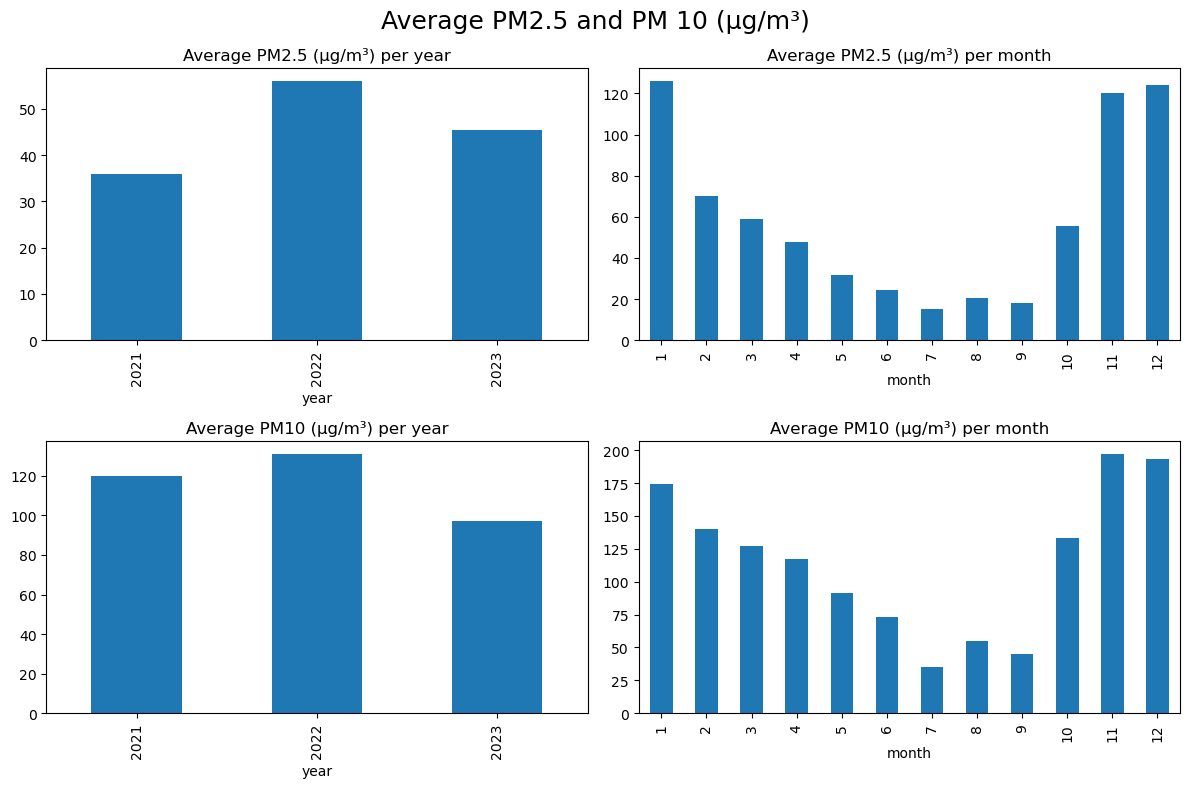

In [316]:
fig, axes = plt.subplots(2,2,figsize = (12,8))

# average PM2.5 per year
(df_new2.groupby(['year'])["PM2.5 (µg/m³)"].median()).plot(kind = 'bar', ax = axes[0][0])
# average PM2.5 per month
(df_new2.groupby(['month'])["PM2.5 (µg/m³)"].median()).plot(kind = 'bar', ax = axes[0][1])
# average PM10 per year
(df_new2.groupby(['year'])["PM10 (µg/m³)"].median()).plot(kind = 'bar', ax = axes[1][0])
# average PM2.5 per month
(df_new2.groupby(['month'])["PM10 (µg/m³)"].median()).plot(kind = 'bar', ax = axes[1][1])


axes[0,0].set_title("Average PM2.5 (µg/m³) per year")
axes[0,1].set_title("Average PM2.5 (µg/m³) per month")
axes[1,0].set_title("Average PM10 (µg/m³) per year")
axes[1,1].set_title("Average PM10 (µg/m³) per month")

# setting the main title
fig.suptitle("Average PM2.5 and PM 10 (µg/m³)", fontsize  = 18)

# Adjusting layout to prevent overlapping titles
plt.tight_layout()

plt.show()

**Observtion**
- Pattern of  PM2.5 and PM 10 (µg/m³) are very similar to each other.
- Winter months 10,11,12 and 1 i.e October, November, December and January are the months with highest PM2.5 and PM 10 (µg/m³).
- It starts to rise as temperatures starts dropping and again to starts to fall down as temperatures rises with arrival of summers.
- Year 2022 had the highest concentration of PM2.5 and PM 10.
- PM2.5 and PM10 had least concentration in year 2021 and 2023 respectively.

Similarly, we analyze other pollutants.

In [317]:
df_new2.columns

Index(['Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)',
       'NO2 (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
       'Ozone (µg/m³)', 'AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'RF (mm)',
       'TOT-RF (mm)', 'SR (W/mt2)', 'BP (mmHg)', 'year', 'month'],
      dtype='object')

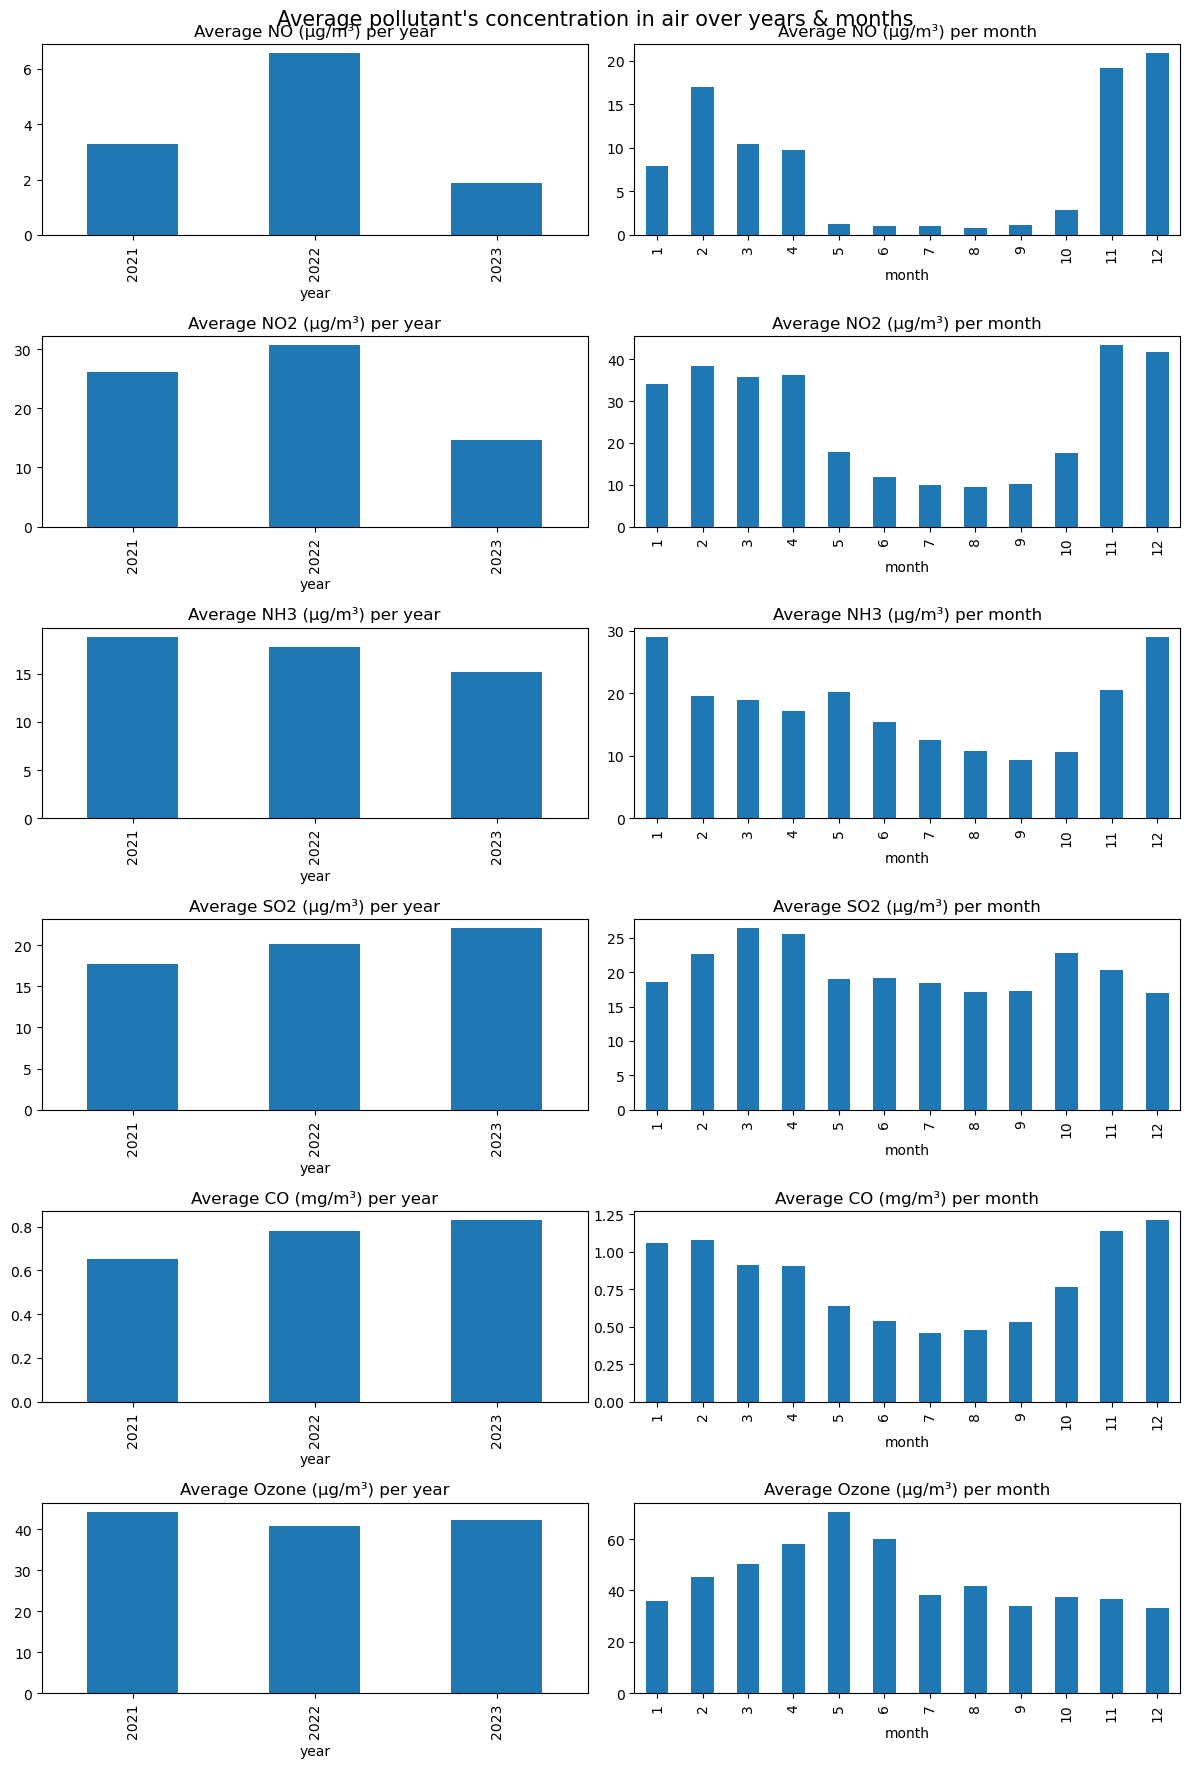

In [318]:
fig, axes = plt.subplots(6,2,figsize = (12,18))

# average NO per year
(df_new2.groupby(['year'])["NO (µg/m³)"].median()).plot(kind = 'bar', ax = axes[0][0])
# average NO per month
(df_new2.groupby(['month'])["NO (µg/m³)"].median()).plot(kind = 'bar', ax = axes[0][1])

# average NO2 per year
(df_new2.groupby(['year'])["NO2 (µg/m³)"].median()).plot(kind = 'bar', ax = axes[1][0])
# average PM2.5 per month
(df_new2.groupby(['month'])["NO2 (µg/m³)"].median()).plot(kind = 'bar', ax = axes[1][1])

# average NH3 per year
(df_new2.groupby(['year'])['NH3 (µg/m³)'].median()).plot(kind = 'bar', ax = axes[2][0])
# average NH3 per month
(df_new2.groupby(['month'])['NH3 (µg/m³)'].median()).plot(kind = 'bar', ax = axes[2][1])

# average SO2 per year
(df_new2.groupby(['year'])['SO2 (µg/m³)'].median()).plot(kind = 'bar', ax = axes[3][0])
# average SO2 per month
(df_new2.groupby(['month'])['SO2 (µg/m³)'].median()).plot(kind = 'bar', ax = axes[3][1])

# average CO per year
(df_new2.groupby(['year'])['CO (mg/m³)'].median()).plot(kind = 'bar', ax = axes[4][0])
# average CO per month
(df_new2.groupby(['month'])['CO (mg/m³)'].median()).plot(kind = 'bar', ax = axes[4][1])

# average Ozone per year
(df_new2.groupby(['year'])['Ozone (µg/m³)'].median()).plot(kind = 'bar', ax = axes[5][0])
# average Ozone per month
(df_new2.groupby(['month'])['Ozone (µg/m³)'].median()).plot(kind = 'bar', ax = axes[5][1])


axes[0,0].set_title("Average NO (µg/m³) per year")
axes[0,1].set_title("Average NO (µg/m³) per month")
axes[1,0].set_title("Average NO2 (µg/m³) per year")
axes[1,1].set_title("Average NO2 (µg/m³) per month")
axes[2,0].set_title("Average NH3 (µg/m³) per year")
axes[2,1].set_title("Average NH3 (µg/m³) per month")
axes[3,0].set_title("Average SO2 (µg/m³) per year")
axes[3,1].set_title("Average SO2 (µg/m³) per month")
axes[4,0].set_title("Average CO (mg/m³) per year")
axes[4,1].set_title("Average CO (mg/m³) per month")
axes[5,0].set_title("Average Ozone (µg/m³) per year")
axes[5,1].set_title("Average Ozone (µg/m³) per month")

# setting the main title
fig.suptitle("Average pollutant's concentration in air over years & months", fontsize  = 15)

# Adjusting layout to prevent overlapping titles
plt.tight_layout()

plt.show()

**Observation**
- NO & NO2 pollutant is showing behaviour similar to PM2.5. High in winter months, and highest in the year of 2022.
- Ammonia concentration was highest in 2021. However, there is not a very significant difference as compare to 2022 & 2023.
- CO and SO2 are consistently increasing with years. There is not huge peak and lows in SO2 concentrations over the years.
- In rainy months, CO concentration in air seems to be dropped as compared to other months.
- Ozone concentrations in air increases in months of summer and drops in months of winter; possibly due to rise in  of home usage of cooling appliances.

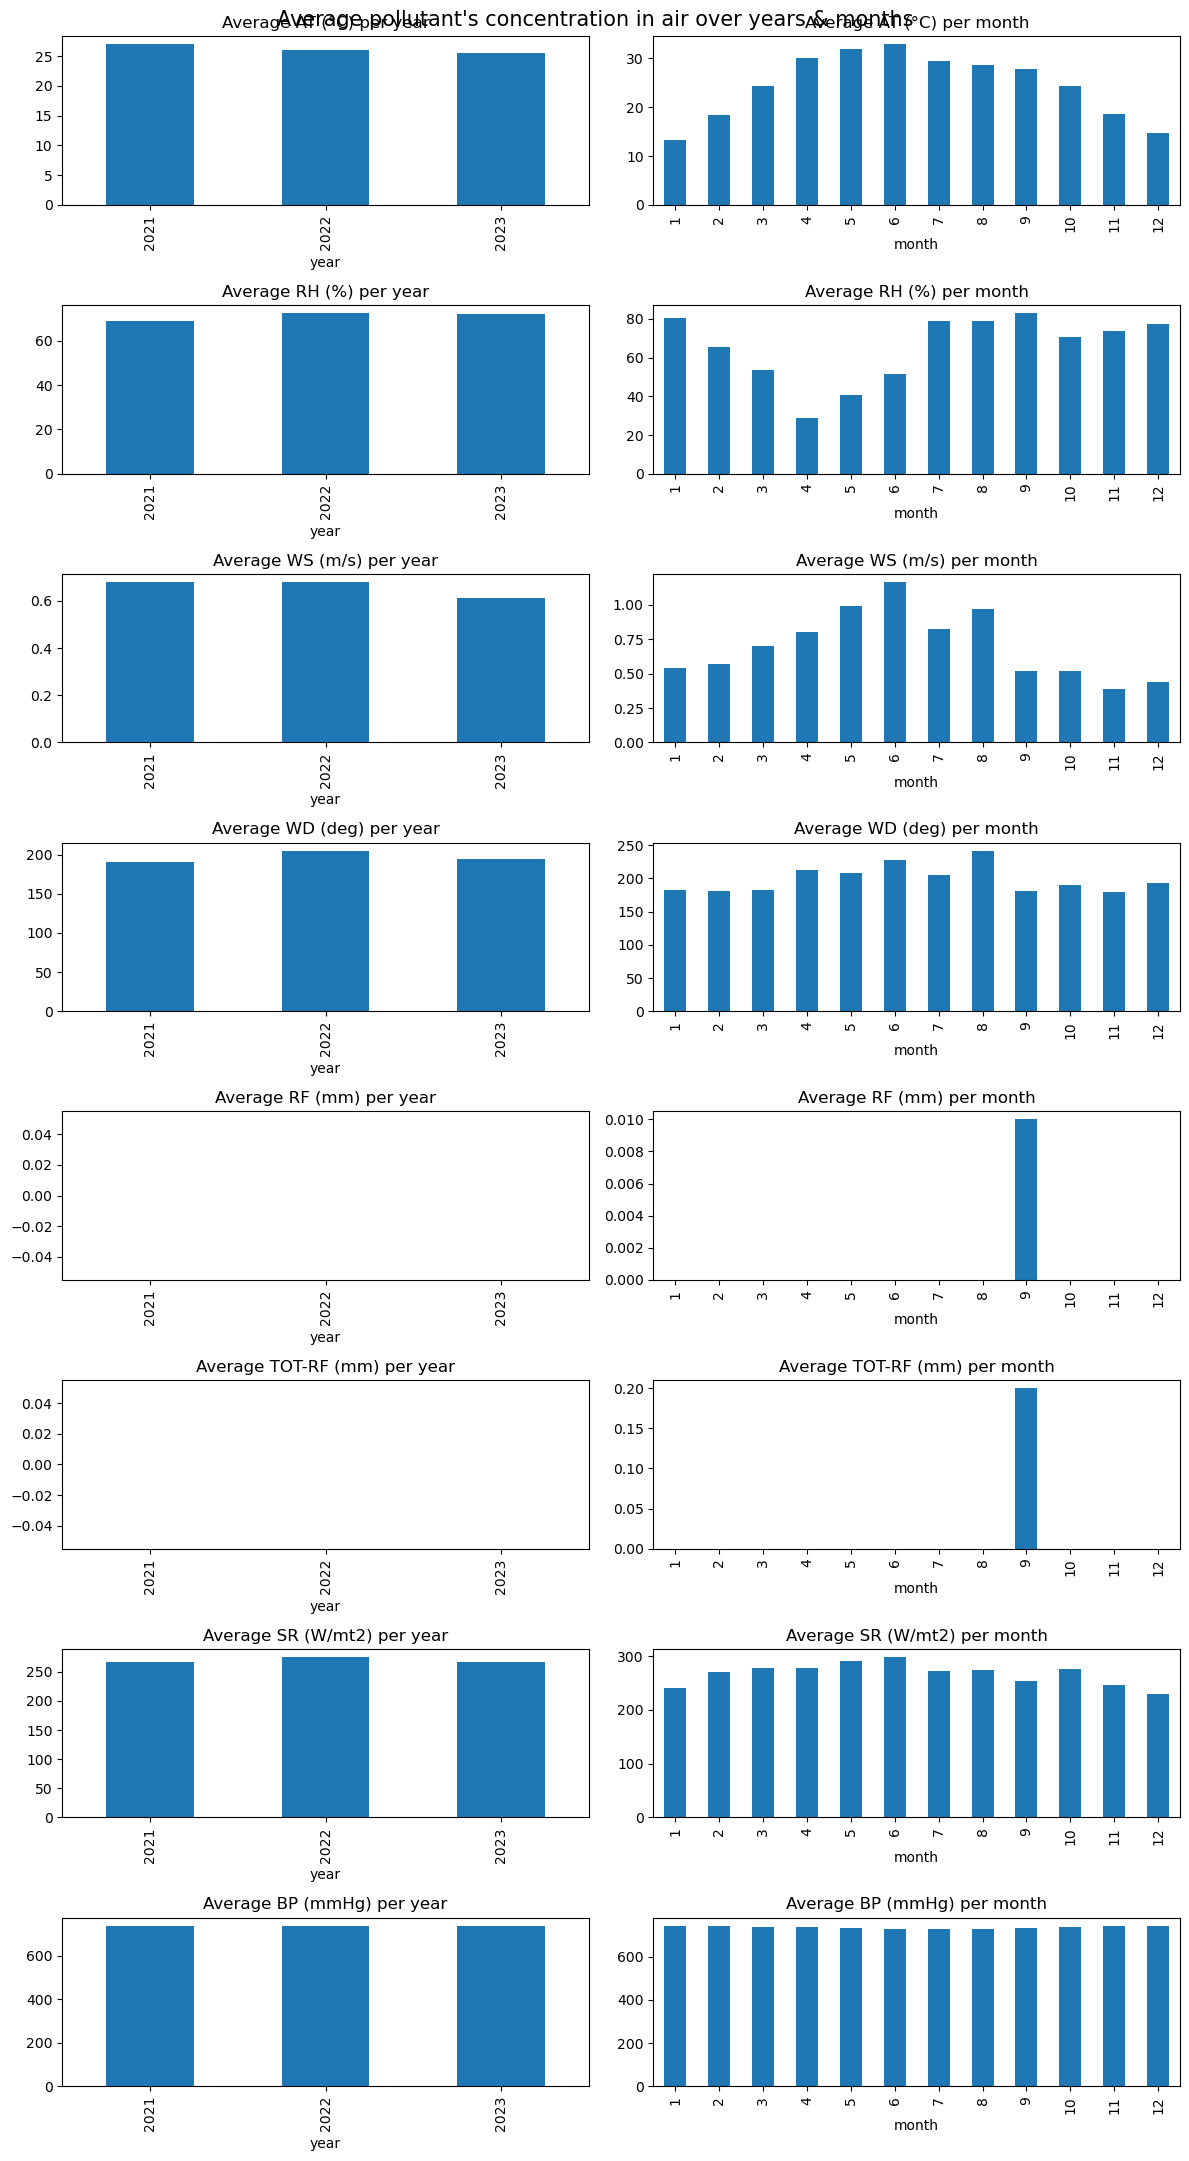

In [320]:
fig, axes = plt.subplots(8,2,figsize = (12,22))

# average AT (°C) per year
(df_new2.groupby(['year'])["AT (°C)"].median()).plot(kind = 'bar', ax = axes[0][0])
# average AT (°C) per month
(df_new2.groupby(['month'])["AT (°C)"].median()).plot(kind = 'bar', ax = axes[0][1])

# average RH (%) per year
(df_new2.groupby(['year'])['RH (%)'].median()).plot(kind = 'bar', ax = axes[1][0])
# average RH (%) per month
(df_new2.groupby(['month'])['RH (%)'].median()).plot(kind = 'bar', ax = axes[1][1])

# average WS (m/s) per year
(df_new2.groupby(['year'])['WS (m/s)'].median()).plot(kind = 'bar', ax = axes[2][0])
# average WS (m/s) per month
(df_new2.groupby(['month'])['WS (m/s)'].median()).plot(kind = 'bar', ax = axes[2][1])

# average WD (deg) per year
(df_new2.groupby(['year'])['WD (deg)'].median()).plot(kind = 'bar', ax = axes[3][0])
# average WD (deg) per month
(df_new2.groupby(['month'])['WD (deg)'].median()).plot(kind = 'bar', ax = axes[3][1])

# average RF (mm) per year
(df_new2.groupby(['year'])['RF (mm)'].median()).plot(kind = 'bar', ax = axes[4][0])
# average RF (mm) per month
(df_new2.groupby(['month'])['RF (mm)'].median()).plot(kind = 'bar', ax = axes[4][1])

# average TOT-RF (mm) per year
(df_new2.groupby(['year'])['TOT-RF (mm)'].median()).plot(kind = 'bar', ax = axes[5][0])
# average TOT-RF (mm) per month
(df_new2.groupby(['month'])['TOT-RF (mm)'].median()).plot(kind = 'bar', ax = axes[5][1])

# average SR  per year
(df_new2.groupby(['year'])['SR (W/mt2)'].median()).plot(kind = 'bar', ax = axes[6][0])
# average SR per month
(df_new2.groupby(['month'])['SR (W/mt2)'].median()).plot(kind = 'bar', ax = axes[6][1])

# average BP  per year
(df_new2.groupby(['year'])['BP (mmHg)'].median()).plot(kind = 'bar', ax = axes[7][0])
# average BP per month
(df_new2.groupby(['month'])['BP (mmHg)'].median()).plot(kind = 'bar', ax = axes[7][1])



axes[0,0].set_title("Average AT (°C) per year")
axes[0,1].set_title("Average AT (°C) per month")
axes[1,0].set_title("Average RH (%) per year")
axes[1,1].set_title("Average RH (%) per month")
axes[2,0].set_title("Average WS (m/s) per year")
axes[2,1].set_title("Average WS (m/s) per month")
axes[3,0].set_title("Average WD (deg) per year")
axes[3,1].set_title("Average WD (deg) per month")
axes[4,0].set_title("Average RF (mm) per year")
axes[4,1].set_title("Average RF (mm) per month")
axes[5,0].set_title("Average TOT-RF (mm) per year")
axes[5,1].set_title("Average TOT-RF (mm) per month")
axes[6,0].set_title("Average SR (W/mt2) per year")
axes[6,1].set_title("Average SR (W/mt2) per month")
axes[7,0].set_title("Average BP (mmHg) per year")
axes[7,1].set_title("Average BP (mmHg) per month")


# setting the main title
fig.suptitle("Average pollutant's concentration in air over years & months", fontsize  = 15)

# Adjusting layout to prevent overlapping titles
plt.tight_layout()

plt.show()

In [321]:
df_new2.groupby('year')['RF (mm)'].median()

year
2021    0.0
2022    0.0
2023    0.0
Name: RF (mm), dtype: float64

**Data Normalization / Standardization**
<br>
we observe that there are various parameters with different metrics. And upon changing the metric the values can be smaller/bigger in magnitude. We don't want out model to affected by this. Hence, we standardize the data.

In [322]:

columns = df_new.columns

# we can transform dates, so we need to remove it while standardization
scaler = StandardScaler()
df_stand = scaler.fit_transform(df_new[columns[1:]]) 

# converting numpy arrays to dataframe
df_stand = pd.DataFrame(df_stand, columns = columns[1:])

# concatenatingg the 'timestamp' feature back
df_stand = pd.concat([df_new['Timestamp'], df_stand], axis = 1)


df_stand.head()

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg)
0,2021-01-01,2.190816,1.578694,0.176932,0.914101,0.559196,3.466436,0.385553,1.325281,-0.608449,-1.942886,0.615287,-0.847685,-1.602364,-0.192722,-0.172183,-0.931488,1.260890
1,2021-01-02,1.840451,1.188339,-0.404384,0.985434,0.323756,3.960749,0.561951,1.514294,-1.383929,-1.626761,0.694368,-0.928963,-0.190357,0.121620,0.153371,-2.963047,1.079550
2,2021-01-03,0.640627,0.060861,-0.679964,-0.128829,-0.387884,3.435392,0.863089,2.057708,0.141532,-1.035437,0.828648,-0.793500,-1.021432,-0.140332,-0.143625,-1.543509,0.744766
3,2021-01-04,0.005227,-0.501490,-0.253610,0.037449,-0.101198,2.277219,0.328853,0.521973,-0.456014,-0.936648,0.467208,-0.576758,-1.205508,-0.192722,-0.172183,-1.531726,0.952456
4,2021-01-05,1.070440,0.288383,-0.481446,0.217010,-0.114251,2.465870,-0.429660,1.703307,-0.452688,-0.809633,0.582380,-0.793500,-0.929166,-0.192722,-0.172183,-0.912069,0.923007


In [323]:
df_modelling = df_stand[columns[1:]]
df_modelling

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg)
0,2.190816,1.578694,0.176932,0.914101,0.559196,3.466436,0.385553,1.325281,-0.608449,-1.942886,0.615287,-0.847685,-1.602364,-0.192722,-0.172183,-0.931488,1.260890
1,1.840451,1.188339,-0.404384,0.985434,0.323756,3.960749,0.561951,1.514294,-1.383929,-1.626761,0.694368,-0.928963,-0.190357,0.121620,0.153371,-2.963047,1.079550
2,0.640627,0.060861,-0.679964,-0.128829,-0.387884,3.435392,0.863089,2.057708,0.141532,-1.035437,0.828648,-0.793500,-1.021432,-0.140332,-0.143625,-1.543509,0.744766
3,0.005227,-0.501490,-0.253610,0.037449,-0.101198,2.277219,0.328853,0.521973,-0.456014,-0.936648,0.467208,-0.576758,-1.205508,-0.192722,-0.172183,-1.531726,0.952456
4,1.070440,0.288383,-0.481446,0.217010,-0.114251,2.465870,-0.429660,1.703307,-0.452688,-0.809633,0.582380,-0.793500,-0.929166,-0.192722,-0.172183,-0.912069,0.923007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1.187526,1.577815,-0.521204,0.175629,-0.203149,2.133749,-0.631424,-0.018241,-0.716786,-1.182915,0.883514,-1.073458,-0.183960,-0.192722,-0.172183,-0.611459,1.527219
1091,1.320686,1.504213,-0.521524,0.052539,-0.267122,2.535851,-0.776804,-0.159509,-0.929714,-1.506185,1.376668,-1.002904,0.098675,-0.192722,-0.172183,-2.167421,1.438421
1092,1.318529,0.891535,-0.527515,-0.209714,-0.407021,1.441897,2.442817,3.006384,-0.596301,-1.478401,1.040527,-0.966216,-0.637219,-0.192722,-0.172183,-1.638085,1.519146
1093,0.805110,0.901223,-0.528940,-0.139731,-0.371484,1.124079,-0.396839,0.212366,-0.866488,-1.593067,1.152206,-1.098857,-1.151942,-0.192722,-0.172183,-1.465579,1.349624


**CORRELATION**

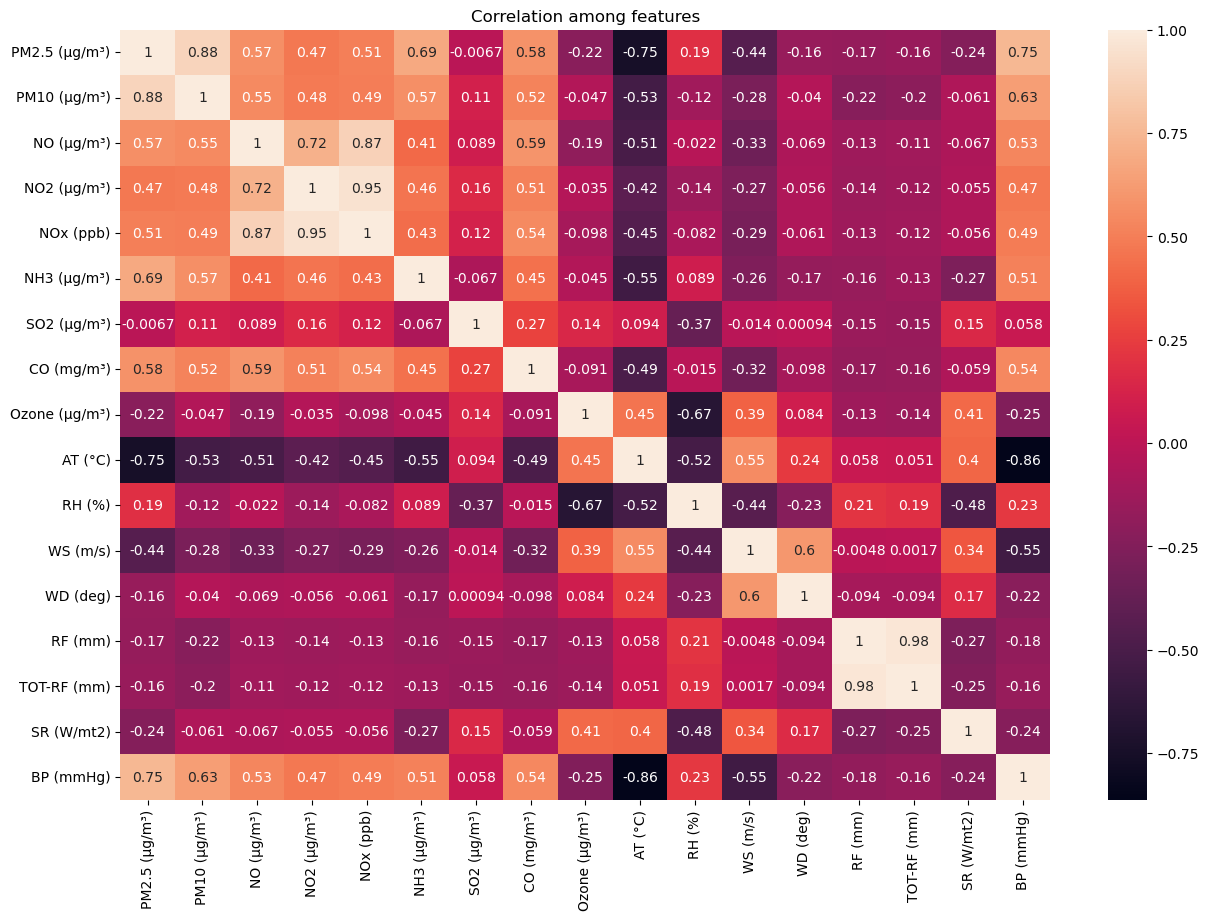

In [324]:
plt.figure(figsize = (15,10))
sns.heatmap(df_modelling.corr(), annot = True)
plt.title("Correlation among features")
plt.show()

As we can observe from the plot above,
<br>
- PM2.5 is **positively** correlated with *PM10(ug/m3)* followed by *BP(mmHg)* and *NH3 (ug/m3)* with values 0.88,0.75 and 0.68 respectively.
- It is **negatively** correlated with *AT(deg C)*.



In [325]:
X = df_modelling[columns[2:]]
y = df_modelling[columns[1]]

### Modelling

#### 1. Train and Test split

we will divide our train into 80:20 as for training and testing, and 50% of this test data is further divided into validation and test data. <br>
we won't introduce randomization while splitting because the data is historical and hence autocorrelated.

In [326]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

 Let's build a function for model evaluation.


In [327]:
def model_evaluation(y_true, y_pred):
    mse = round(mean_squared_error(y_true, y_pred),3)
    rmse = round(mse**0.5,3)
    mae = round(mean_absolute_error(y_true,y_pred),3)
    r_square = round(r2_score(y_true, y_pred),3)
    return [mse,rmse,mae,r_square]
    
    

#### Model 1 : Lasso / Linear Regression with L1 Regularization

In order to find the lasso model, we need to do its hyperparametric tuning. This can be done with *GridSearchCV* or *RandomizedSearchCV*. Here, *GridSearchCV* is used.

In [355]:
# Define the parameter grid to search
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# model
lasso  = Lasso()

# performing gridsearch with cross validation
grid_sear_lasso = GridSearchCV(estimator = lasso,param_grid = param_grid,cv = 7, scoring = "r2")
grid_sear_lasso.fit(X_train,y_train)

GridSearchCV(cv=7, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]}, scoring='r2')

In [356]:
## finding the best estimator or lasso model
print('Best hyperparameters : ', grid_sear.best_params_)
print("Best R^2 score : ", grid_sear.best_score_) # for validation data

Best hyperparameters :  {'alpha': 0.001}
Best R^2 score :  0.9168158005463903


This is a pretty good R^2 score. The closer it is to 1, better our model becomes. Now, let's check our model's performance on test data.

In [357]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train,y_train)

Lasso(alpha=0.001)

In [358]:
# predictions of test data
lasso_pred = lasso.predict(X_test)
lasso_evaluation = model_evaluation(lasso_pred,y_test)

# model evaluations
print("For metrics:  MSE, RMSE, MAE, R^2 " ,lasso_evaluation, "respectively.")

For metrics:  MSE, RMSE, MAE, R^2  [0.071, 0.266, 0.207, 0.912] respectively.


Hence, we can say that our model is performing quite well. 
<br> We already know that lasso, also helps in removing the multicollinearity and  figure out the important features simultaneously.
<br>
Let's find out what are the important features in predicting PM2.5.

<Axes: title={'center': 'features importance with Lasso'}, xlabel='features', ylabel='Coefficients/Weights'>

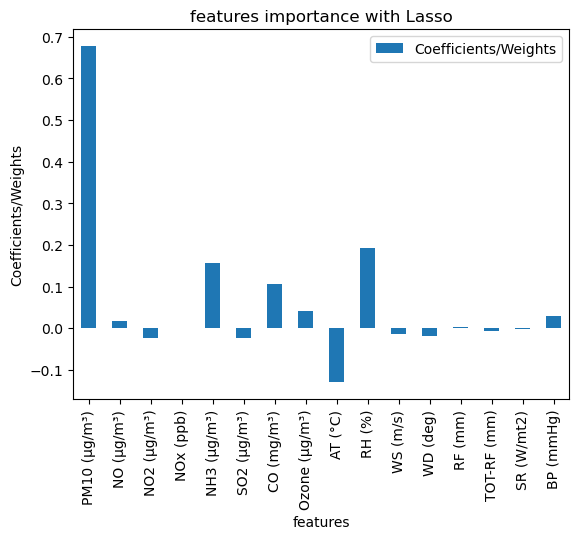

In [332]:
t = pd.DataFrame({"features" : X_train.columns ,"Coefficients/Weights" : lasso.coef_})
t = t.set_index('features')
t.plot(kind = 'bar', title = 'features importance with Lasso', ylabel = 'Coefficients/Weights')

#### Model 2 : Regression through ensemble methods

**2.1 Random Forest Regressor**

In [333]:
# random forest regressor
rf_regressor = RandomForestRegressor()

# hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],    # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# hyperparameter tuning using GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=7, scoring='r2', verbose=1)
grid_search_rf.fit(X_train, y_train)

Fitting 7 folds for each of 108 candidates, totalling 756 fits


GridSearchCV(cv=7, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=1)

In [359]:
## finding the best estimator for Random Forest Regressor Model
print('Best hyperparameters : ', grid_search_rf.best_params_)
print("Best R^2 score : ", grid_search_rf.best_score_)

Best hyperparameters :  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best R^2 score :  0.9506971255358191


In [360]:
rf_regressor = grid_search_rf.best_estimator_
rf_regressor.fit(X_train,y_train)

# making predictions usin the model with best parameters
rf_pred = rf_regressor.predict(X_test)

# evaluating the best model
print("For metrics:  MSE, RMSE, MAE, R^2 " ,model_evaluation(rf_pred,y_test), "respectively.")

For metrics:  MSE, RMSE, MAE, R^2  [0.044, 0.21, 0.135, 0.945] respectively.


As we can observe this model is also **performing slightly better over  Lasso**.

In [336]:
rf_regressor.feature_importances_

array([3.72873695e-01, 2.64618722e-03, 7.63605311e-03, 3.85440599e-03,
       1.29810872e-02, 3.79624517e-03, 5.67094522e-03, 2.57489228e-03,
       5.55108004e-01, 8.68863847e-03, 7.22217693e-03, 3.06213340e-03,
       1.48504484e-04, 1.95494146e-04, 5.11258437e-03, 8.42895307e-03])

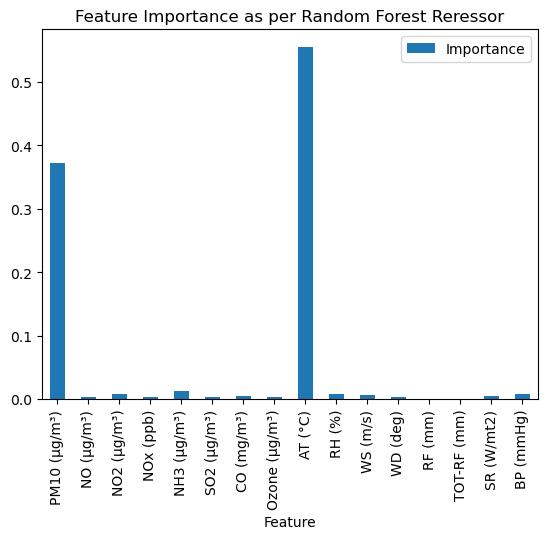

In [337]:
important_features_rf = rf_regressor.feature_importances_ 
rf_feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': important_features_rf})
(rf_feature_importance.set_index("Feature")).plot(kind = 'bar', title = 'Feature Importance as per Random Forest Reressor')
plt.show()

#### Model 3 : Gradient Boosting Regressor

In [366]:
# parameter of gradient Boosting regressor
param_grid = {"n_estimators" : [200,300,350],
              "learning_rate" : [0.01, 0.1, 0.5],
              "max_depth":  [5,7,10]
             }

gbregressor = GradientBoostingRegressor()
grid_search_gbr = GridSearchCV(estimator = gbregressor,param_grid = param_grid,cv = 7, scoring = 'r2', verbose = 1)

# fitting
grid_search_gbr.fit(X_train,y_train)

Fitting 7 folds for each of 27 candidates, totalling 189 fits


GridSearchCV(cv=7, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [5, 7, 10],
                         'n_estimators': [200, 300, 350]},
             scoring='r2', verbose=1)

In [367]:
## finding the best parameters for gradient Boosting regressor
print('Best hyperparameters : ', grid_search_gbr.best_params_)
print("Best R^2 score : ", grid_search_gbr.best_score_)

Best hyperparameters :  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best R^2 score :  0.951720833976141


In [368]:
# Building model on best parameters
gbr_regressor = grid_search_gbr.best_estimator_

# making predictions usin the model with best parameters
gbr_pred = gbr_regressor.predict(X_test)

# evaluating the best model
# model evaluations
print("For metrics:  MSE, RMSE, MAE, R^2 " ,model_evaluation(gbr_pred,y_test), "respectively.")

For metrics:  MSE, RMSE, MAE, R^2  [0.043, 0.207, 0.132, 0.947] respectively.


Let's find out, as per the Gradient Boosting Regressor, what are the important features.

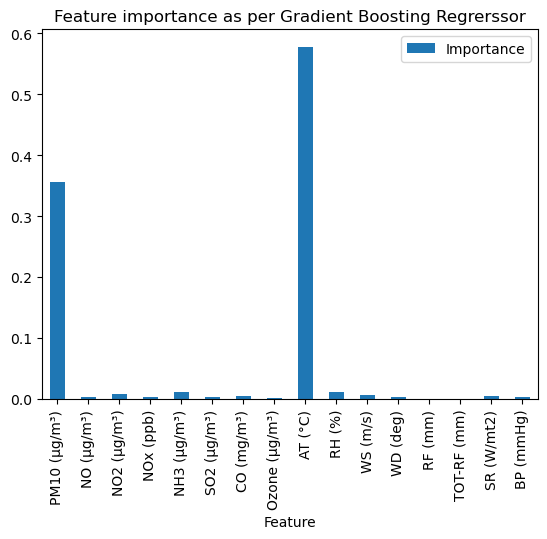

In [341]:
# feature importance
important_features_gbr = gbr_regressor.feature_importances_ 
gbr_feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': important_features_gbr})
(gbr_feature_importance.set_index("Feature")).plot(kind = 'bar', title = 'Feature importance as per Gradient Boosting Regrerssor')
plt.show()

Like in Random Forest Regressor, in gardient boosting regression also, features *AT degree celsious* and *PM 10*) are the most important features. This implies that PM10 and air temperature plays an important role.

#### Model 4 : TPOT regressor (*AutoML*)

TPOT is an automated machine learning tool that uses genetic programming to search for the best machine learning pipelines for your data. It automates the process of **feature selection** and **pipeline construction**, including **hyperparameter optimization**.

In [342]:
# splitting the data
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [343]:
tpot = TPOTRegressor(generations = 5, population_size = 20, verbosity = 3)
tpot.fit(X_train,y_train)

30 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current Pareto front scores:

-1	-0.08883008070716256	ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.55, ElasticNetCV__tol=0.0001)

-2	-0.07654562839499034	RidgeCV(KNeighborsRegressor(input_matrix, KNeighborsRegressor__n_neighbors=23, KNeighborsRegressor__p=2, KNeighborsRegressor__weights=uniform))
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'quantile', 'absolute_error', 'huber', 'squ

TPOTRegressor(generations=5, population_size=20, verbosity=3)

In [344]:
# on test data
tpot.score(X_test,y_test)

-0.03834594667964259

In [345]:
tpot_pred = tpot.predict(X_test)

# model evaluations
print("For metrics:  MSE, RMSE, MAE, R^2 " ,model_evaluation(tpot_pred,y_test), "respectively.")

For metrics:  MSE, RMSE, MAE, R^2  [0.038, 0.195, 0.133, 0.951] respectively.


Since neg_mse is a negative value, the closer it is to zero (or the more positive it is), the better the performance. That's because neg_mse is essentially the negative of MSE, and MSE is a measure of the average deviation of the predicted values from the actual values. Therefore, a neg_mse value close to zero indicates that the model's predictions are close to the actual values on average.

#### Models Evaluation

In [369]:
model_names = ['Lasso',"Random Forest Regressor","Gradient Boosting Regressor", "TPot"]
models_evaluation = pd.DataFrame(index = model_names, columns = ['MSE', "RMSE", "MAE", "R^2"])

models_evaluation.loc['Lasso'] = model_evaluation(lasso_pred,y_test)
models_evaluation.loc['Random Forest Regressor'] = model_evaluation(rf_pred,y_test)
models_evaluation.loc['Gradient Boosting Regressor'] = model_evaluation(gbr_pred,y_test)
models_evaluation.loc['TPot'] = model_evaluation(tpot_pred,y_test)

models_evaluation

,MSE,RMSE,MAE,R^2
Lasso,0.071,0.266,0.207,0.912
Random Forest Regressor,0.044,0.21,0.135,0.945
Gradient Boosting Regressor,0.043,0.207,0.132,0.947
TPot,0.038,0.195,0.133,0.951


<Figure size 800x1200 with 0 Axes>

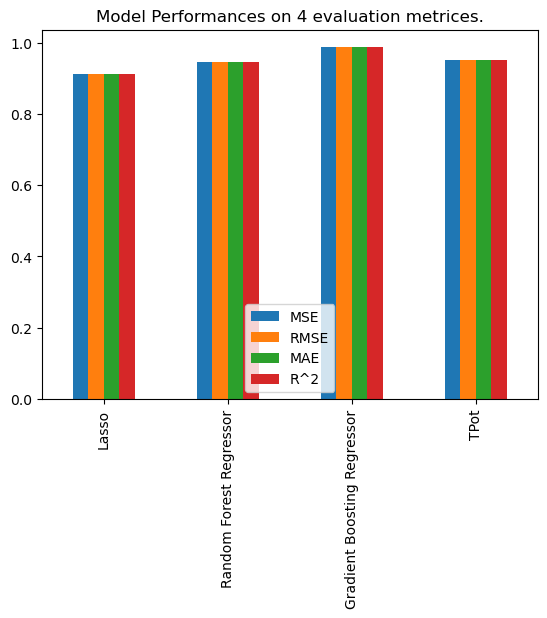

In [363]:
#visualization
plt.figure(figsize = (8,12))
models_evaluation.plot(kind = 'bar', title = "Model Performances on 4 evaluation metrices.")
plt.show()

This implies that our model "Gradient Boosting Regressor" was the best. However, it should be noted that Random Forest Regressor and TPot performance is comparable.

In future: I want to build model using Time Series Analysis and Neural Networks to build a more efficient and robust model.